In [5]:
from matplotlib import dates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

### Loading finance data

In [6]:
raw = yf.download('SPY AAPL', start='2010-01-01', end='2019-12-31')

[*********************100%***********************]  2 of 2 completed


In [7]:
raw

Price                      Adj Close                  Close              \
Ticker                          AAPL         SPY       AAPL         SPY   
Date                                                                      
2010-01-04 00:00:00+00:00   6.454506   86.315994   7.643214  113.330002   
2010-01-05 00:00:00+00:00   6.465665   86.544472   7.656429  113.629997   
2010-01-06 00:00:00+00:00   6.362820   86.605408   7.534643  113.709999   
2010-01-07 00:00:00+00:00   6.351057   86.971001   7.520714  114.190002   
2010-01-08 00:00:00+00:00   6.393282   87.260414   7.570714  114.570000   
...                              ...         ...        ...         ...   
2019-12-23 00:00:00+00:00  68.908981  298.813202  71.000000  321.220001   
2019-12-24 00:00:00+00:00  68.974503  298.822540  71.067497  321.230011   
2019-12-26 00:00:00+00:00  70.343002  300.413269  72.477501  322.940002   
2019-12-27 00:00:00+00:00  70.316292  300.338837  72.449997  322.859985   
2019-12-30 00:00:00+00:00  70.733620  298.682983  72.879997  321.079987   

Price                           High                    Low              \
Ticker                          AAPL         SPY       AAPL         SPY   
Date                                                                      
2010-01-04 00:00:00+00:00   7.660714  113.389999   7.585000  111.510002   
2010-01-05 00:00:00+00:00   7.699643  113.680000   7.616071  112.849998   
2010-01-06 00:00:00+00:00   7.686786  113.989998   7.526786  113.430000   
2010-01-07 00:00:00+00:00   7.571429  114.330002   7.466071  113.180000   
2010-01-08 00:00:00+00:00   7.571429  114.620003   7.466429  113.660004   
...                              ...         ...        ...         ...   
2019-12-23 00:00:00+00:00  71.062500  321.649994  70.092499  321.059998   
2019-12-24 00:00:00+00:00  71.222504  321.519989  70.730003  320.899994   
2019-12-26 00:00:00+00:00  72.495003  322.950012  71.175003  321.640015   
2019-12-27 00:00:00+00:00  73.492500  323.799988  72.029999  322.279999   
2019-12-30 00:00:00+00:00  73.172501  323.100006  71.305000  320.549988   

Price                           Open                 Volume             
Ticker                          AAPL         SPY       AAPL        SPY  
Date                                                                    
2010-01-04 00:00:00+00:00   7.622500  112.370003  493729600  118944600  
2010-01-05 00:00:00+00:00   7.664286  113.260002  601904800  111579900  
2010-01-06 00:00:00+00:00   7.656429  113.519997  552160000  116074400  
2010-01-07 00:00:00+00:00   7.562500  113.500000  477131200  131091100  
2010-01-08 00:00:00+00:00   7.510714  113.889999  447610800  126402800  
...                              ...         ...        ...        ...  
2019-12-23 00:00:00+00:00  70.132500  321.589996   98572000   52990000  
2019-12-24 00:00:00+00:00  71.172501  321.470001   48478800   20270000  
2019-12-26 00:00:00+00:00  71.205002  321.649994   93121200   30911200  
2019-12-27 00:00:00+00:00  72.779999  323.739990  146266000   42528800  
2019-12-30 00:00:00+00:00  72.364998  322.950012  144114400   49729100  

[2515 rows x 12 columns]

In [8]:
raw.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close',  'SPY'),
            (    'Close', 'AAPL'),
            (    'Close',  'SPY'),
            (     'High', 'AAPL'),
            (     'High',  'SPY'),
            (      'Low', 'AAPL'),
            (      'Low',  'SPY'),
            (     'Open', 'AAPL'),
            (     'Open',  'SPY'),
            (   'Volume', 'AAPL'),
            (   'Volume',  'SPY')],
           names=['Price', 'Ticker'])

In [9]:
raw.index

DatetimeIndex(['2010-01-04 00:00:00+00:00', '2010-01-05 00:00:00+00:00',
               '2010-01-06 00:00:00+00:00', '2010-01-07 00:00:00+00:00',
               '2010-01-08 00:00:00+00:00', '2010-01-11 00:00:00+00:00',
               '2010-01-12 00:00:00+00:00', '2010-01-13 00:00:00+00:00',
               '2010-01-14 00:00:00+00:00', '2010-01-15 00:00:00+00:00',
               ...
               '2019-12-16 00:00:00+00:00', '2019-12-17 00:00:00+00:00',
               '2019-12-18 00:00:00+00:00', '2019-12-19 00:00:00+00:00',
               '2019-12-20 00:00:00+00:00', '2019-12-23 00:00:00+00:00',
               '2019-12-24 00:00:00+00:00', '2019-12-26 00:00:00+00:00',
               '2019-12-27 00:00:00+00:00', '2019-12-30 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=2515, freq=None)

In [16]:
def fix_cols(df):
    columns=df.columns
    outer = [col[0] for col in columns]
    df.columns=outer
    return df

def tweak_data():
    raw = yf.download('SPY AAPL', start='2010-01-01', end='2019-12-31')
    return( raw
           .iloc[:,::2]
           .pipe(fix_cols)
          )
    return raw

aapl_data=tweak_data()           
        

[*********************100%***********************]  2 of 2 completed


### Line Plots

<Axes: xlabel='Date'>

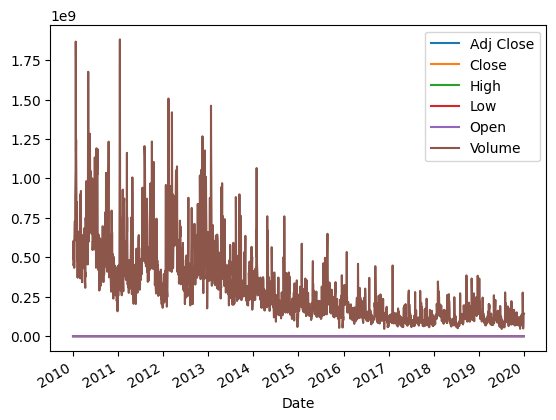

In [18]:
aapl_data.plot()

<Axes: xlabel='Date'>

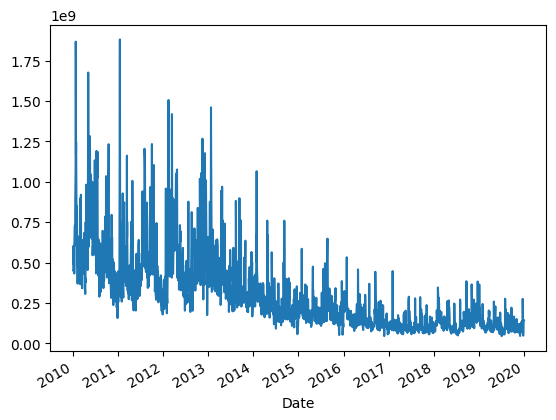

In [19]:
aapl_data.Volume.plot()

<Axes: xlabel='Date'>

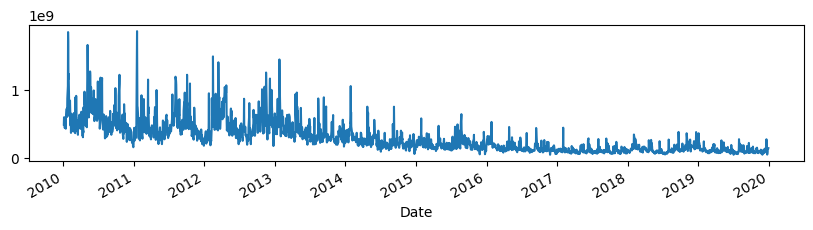

In [21]:
aapl_data.Volume.plot(figsize=(10,2))

### Resampling data

In [28]:
(aapl_data
    .resample('ME')   # offset alias  
    .Close
    .mean()
)


Date
2010-01-31 00:00:00+00:00     7.418402
2010-02-28 00:00:00+00:00     7.099850
2010-03-31 00:00:00+00:00     7.978960
2010-04-30 00:00:00+00:00     8.969592
2010-05-31 00:00:00+00:00     8.980768
                               ...    
2019-08-31 00:00:00+00:00    51.239432
2019-09-30 00:00:00+00:00    54.498750
2019-10-31 00:00:00+00:00    58.821630
2019-11-30 00:00:00+00:00    65.630126
2019-12-31 00:00:00+00:00    68.917374
Freq: ME, Name: Close, Length: 120, dtype: float64

<Axes: xlabel='Date'>

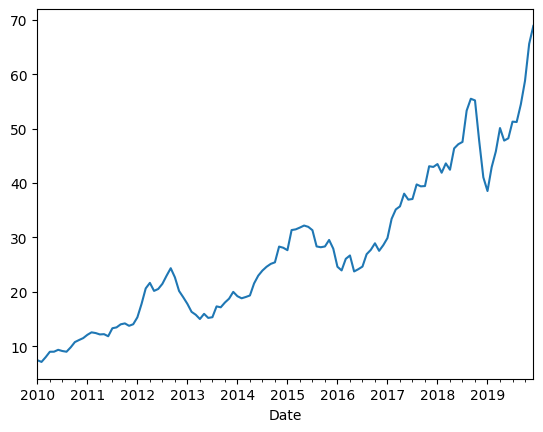

In [26]:
(aapl_data
    .resample('ME')
    .Close
    .mean()
    .plot() 
)
             

### Candlestick plot

In [30]:
aapl_data

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04 00:00:00+00:00,6.454506,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05 00:00:00+00:00,6.465665,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06 00:00:00+00:00,6.362820,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07 00:00:00+00:00,6.351057,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08 00:00:00+00:00,6.393282,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2019-12-23 00:00:00+00:00,68.908981,71.000000,71.062500,70.092499,70.132500,98572000
2019-12-24 00:00:00+00:00,68.974503,71.067497,71.222504,70.730003,71.172501,48478800
2019-12-26 00:00:00+00:00,70.343002,72.477501,72.495003,71.175003,71.205002,93121200


,Open,High,Low,Close
Date,,,,
2018-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN
2018-01-02 00:00:00+00:00,42.540001,43.075001,42.314999,43.064999
2018-01-03 00:00:00+00:00,43.132500,43.637501,42.990002,43.057499
2018-01-04 00:00:00+00:00,43.134998,43.367500,43.020000,43.257500
2018-01-05 00:00:00+00:00,43.360001,43.842499,43.262501,43.750000
...,...,...,...,...
2018-06-26 00:00:00+00:00,45.747501,46.632500,45.634998,46.107498
2018-06-27 00:00:00+00:00,46.307499,46.820000,46.007500,46.040001
2018-06-28 00:00:00+00:00,46.025002,46.552502,45.950001,46.375000


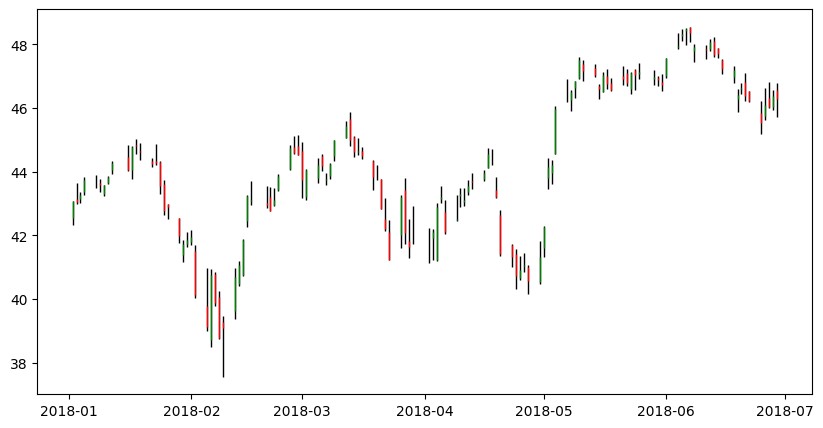

In [45]:
fig,ax = plt.subplots(figsize=(10,5))

def plot_candle(df, ax):
    # wick
    ax.vlines(x=df.index, ymin=df.Low, ymax=df.High, colors='k', linewidth=1)
    # red decrease
    red= df.query('Open > Close')
    ax.vlines(x=red.index, ymin=red.Close, ymax=red.Open, colors='r', linewidth=1)

    # green increase
    green= df.query('Open <= Close')
    ax.vlines(x=green.index, ymin=green.Close, ymax=green.Open, colors='g', linewidth=1)
    
    return df

(aapl_data
   .resample('D')
   .agg({'Open':'first', 'High':'max', 'Low':'min', 'Close':'last'})
   .loc['jan 2018':'jun 2018']
   .pipe(plot_candle, ax)
)
         

### Returns and Volatility calulations and plotting

In [46]:
aapl_data.pct_change()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05 00:00:00+00:00,0.001729,0.001729,0.005082,0.004096,0.005482,0.219098
2010-01-06 00:00:00+00:00,-0.015906,-0.015906,-0.001670,-0.011723,-0.001025,-0.082646
2010-01-07 00:00:00+00:00,-0.001849,-0.001849,-0.015007,-0.008066,-0.012268,-0.135882
2010-01-08 00:00:00+00:00,0.006648,0.006648,0.000000,0.000048,-0.006848,-0.061871
...,...,...,...,...,...,...
2019-12-23 00:00:00+00:00,0.016319,0.016318,0.005661,0.006498,-0.006023,-0.642827
2019-12-24 00:00:00+00:00,0.000951,0.000951,0.002252,0.009095,0.014829,-0.508189
2019-12-26 00:00:00+00:00,0.019841,0.019840,0.017867,0.006292,0.000457,0.920864


<Axes: xlabel='Date'>

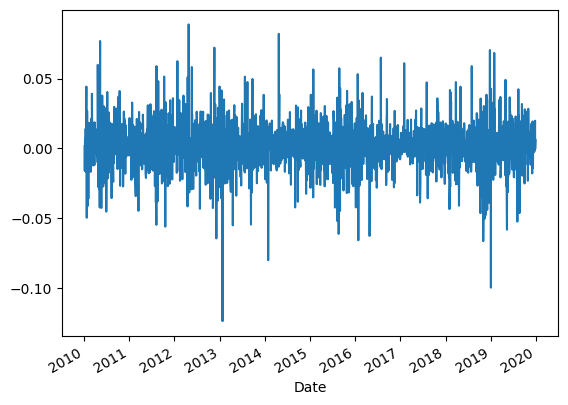

In [47]:
(aapl_data
 .pct_change()
 .Close
 .plot()
)

<Axes: >

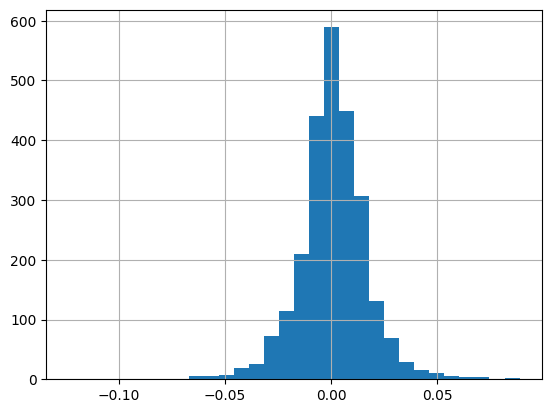

In [49]:
(aapl_data
 .pct_change()
 .Close
 .hist(bins=30)
)

<Axes: xlabel='Date'>

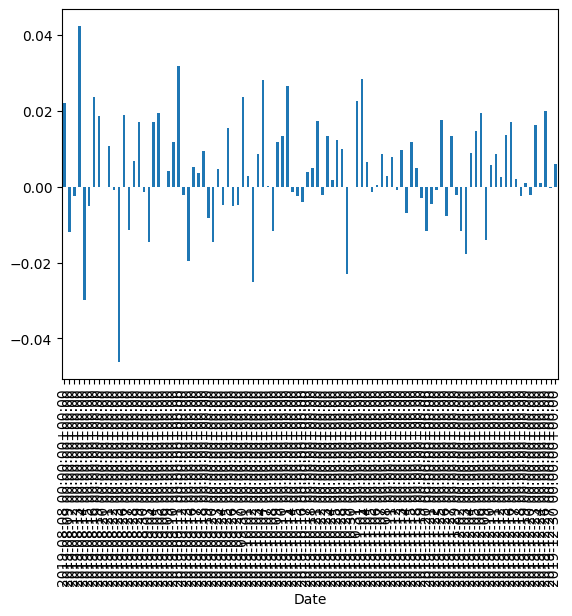

In [50]:
(aapl_data
 .pct_change()
 .Close
 .iloc[-100:]
 .plot.bar()
)
# panda converts index (in this case) as catgorical variable and that makes hard to visualize 

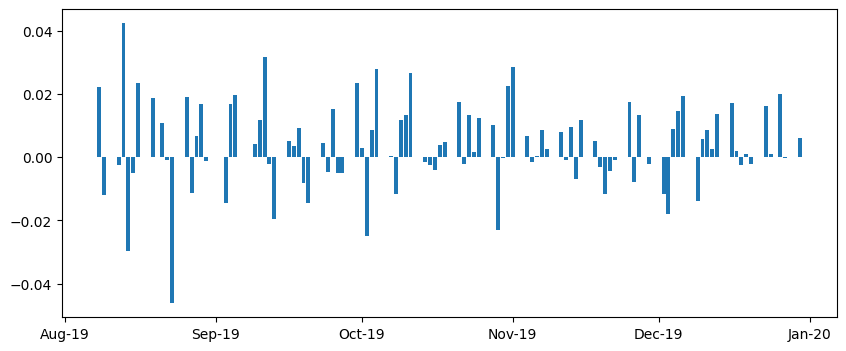

In [55]:
# using matplotlib

fig,ax = plt.subplots(figsize=(10,4))
def barchart(ser,ax):
    ax.bar(ser.index, ser)
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    #ax.xaxis.set_minor_formatter(dates.DayLocator())
    return ser
    

_=(aapl_data
 .pct_change()
 .Close
 .iloc[-100:]
 .pipe(barchart, ax)
)


C:\Users\deepa\AppData\Local\Temp\ipykernel_22132\1871071912.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  .sub(aapl_data.Close[0])
C:\Users\deepa\AppData\Local\Temp\ipykernel_22132\1871071912.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  .div(aapl_data.Close[0])


<Axes: xlabel='Date'>

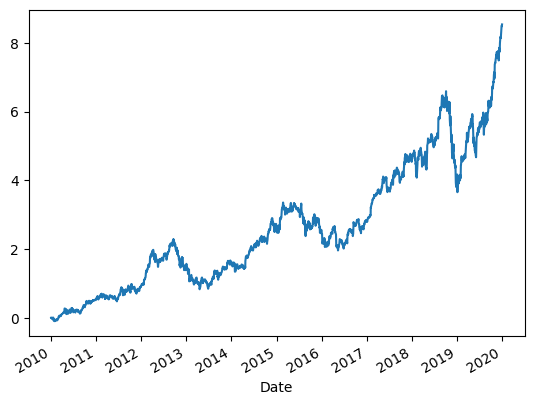

In [57]:
# cumulative returns
# (current price -orig price)/orig price
(aapl_data
 .Close
 .sub(aapl_data.Close[0])
 .div(aapl_data.Close[0])
 .plot()
)


<Axes: xlabel='Date'>

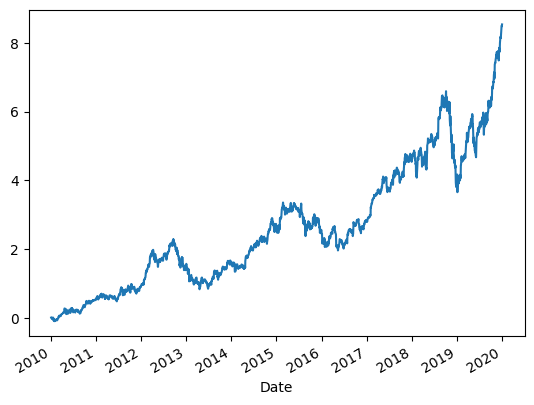

In [58]:
# alternative Cumulative return computation
# (1+r1)(a+r2)-1
(aapl_data
 .Close
 .pct_change()
 .add(1)
 .cumprod()
 .sub(1)
 .plot()
)
 

In [66]:
# adding cumulative return as a new column to df

def calc_cum_returns(df, col):
    ser=df[col]
    return ( ser
             .sub(ser[0])
             .div(ser[0])
           )

aapl_data = (aapl_data.assign(cum_returns=lambda df:calc_cum_returns(df,'Close')))

C:\Users\deepa\AppData\Local\Temp\ipykernel_22132\2598757289.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  .sub(ser[0])
C:\Users\deepa\AppData\Local\Temp\ipykernel_22132\2598757289.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  .div(ser[0])


In [67]:
aapl_data

,Adj Close,Close,High,Low,Open,Volume,cum_returns
Date,,,,,,,
2010-01-04 00:00:00+00:00,6.454506,7.643214,7.660714,7.585000,7.622500,493729600,0.000000
2010-01-05 00:00:00+00:00,6.465665,7.656429,7.699643,7.616071,7.664286,601904800,0.001729
2010-01-06 00:00:00+00:00,6.362820,7.534643,7.686786,7.526786,7.656429,552160000,-0.014205
2010-01-07 00:00:00+00:00,6.351057,7.520714,7.571429,7.466071,7.562500,477131200,-0.016027
2010-01-08 00:00:00+00:00,6.393282,7.570714,7.571429,7.466429,7.510714,447610800,-0.009486
...,...,...,...,...,...,...,...
2019-12-23 00:00:00+00:00,68.908981,71.000000,71.062500,70.092499,70.132500,98572000,8.289286
2019-12-24 00:00:00+00:00,68.974503,71.067497,71.222504,70.730003,71.172501,48478800,8.298117
2019-12-26 00:00:00+00:00,70.343002,72.477501,72.495003,71.175003,71.205002,93121200,8.482594


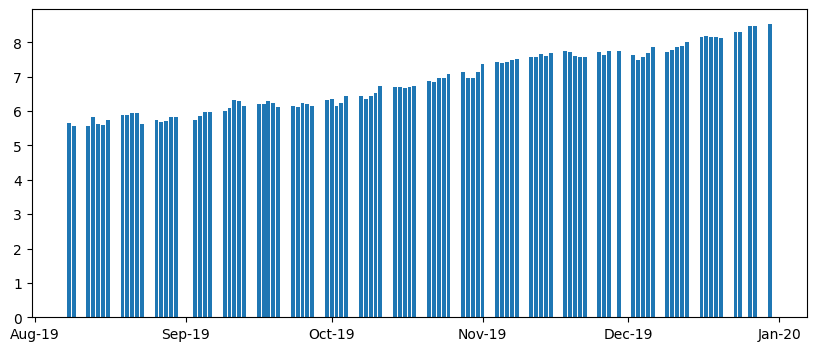

In [69]:
# cumuative returns using matplotlib

fig,ax = plt.subplots(figsize=(10,4))
_=(aapl_data
 .cum_returns
 .iloc[-100:]
 .pipe(barchart, ax)
)

In [70]:
(aapl_data
 .assign(pct_change_close=aapl_data.Close.pct_change())
 .pct_change_close
 .std()
)

np.float64(0.01623613318144791)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

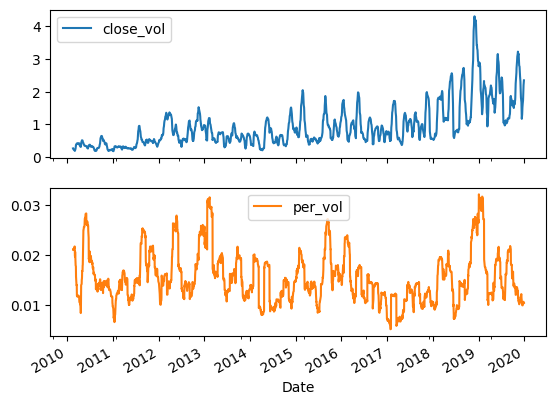

In [78]:
(aapl_data
 .assign(close_vol=aapl_data.rolling(30).Close.std(),
         per_vol=aapl_data.Close.pct_change().rolling(30).std() )
 .iloc[:, -2:]
 .plot(subplots=True)
)

In [71]:
# 15 days volatility
(aapl_data
 .assign(pct_change_close=aapl_data.Close.pct_change())
 .resample('15D')
 .std()
)

,Adj Close,Close,High,Low,Open,Volume,cum_returns,pct_change_close
Date,,,,,,,,
2010-01-04 00:00:00+00:00,0.077656,0.091958,0.072060,0.101749,0.080372,7.028347e+07,0.012031,0.010383
2010-01-19 00:00:00+00:00,0.225595,0.267141,0.253188,0.232856,0.234097,4.361002e+08,0.034951,0.030046
2010-02-03 00:00:00+00:00,0.112474,0.133188,0.102614,0.124059,0.123349,1.455474e+08,0.017426,0.017088
2010-02-18 00:00:00+00:00,0.136220,0.161306,0.138608,0.166270,0.157960,9.844200e+07,0.021105,0.011254
2010-03-05 00:00:00+00:00,0.073895,0.087505,0.088090,0.113449,0.129484,1.951401e+08,0.011449,0.014002
...,...,...,...,...,...,...,...,...
2019-10-29 00:00:00+00:00,1.734707,1.725581,1.449098,2.018594,1.418779,2.960150e+07,0.225766,0.013412
2019-11-13 00:00:00+00:00,0.512233,0.527773,0.404718,0.436709,0.509585,1.787058e+07,0.069051,0.009868
2019-11-28 00:00:00+00:00,0.969430,0.998849,1.019784,0.918851,0.936544,2.826525e+07,0.130684,0.012526


In [73]:
# 15 days rolling volatility
(aapl_data
 .assign(pct_change_close=aapl_data.Close.pct_change())
 .rolling(window=15,min_periods=15)
 .std()
)

,Adj Close,Close,High,Low,Open,Volume,cum_returns,pct_change_close
Date,,,,,,,,
2010-01-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2019-12-23 00:00:00+00:00,1.833123,1.888754,1.932242,1.953716,1.906586,4.891036e+07,0.247115,0.010997
2019-12-24 00:00:00+00:00,1.722599,1.774875,1.762143,1.842910,1.836871,5.206250e+07,0.232216,0.009136
2019-12-26 00:00:00+00:00,1.744200,1.797126,1.757091,1.821097,1.758186,5.084715e+07,0.235127,0.009786


<Axes: xlabel='Date'>

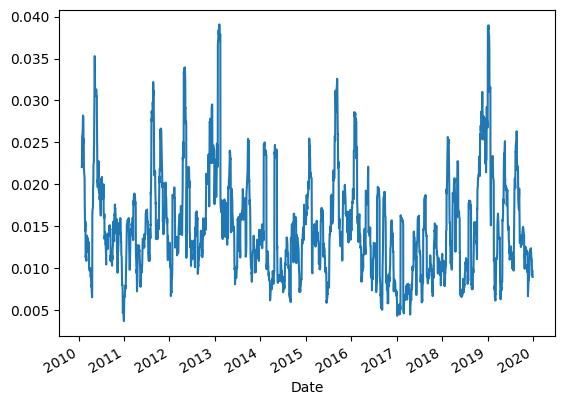

In [80]:
# 15 days rolling volatility close price  pct change plot
(aapl_data
 .assign(pct_change_close=aapl_data.Close.pct_change())
 .rolling(window=15,min_periods=15)
 .std()
 ['pct_change_close']
 .plot()
)

<Axes: xlabel='Date'>

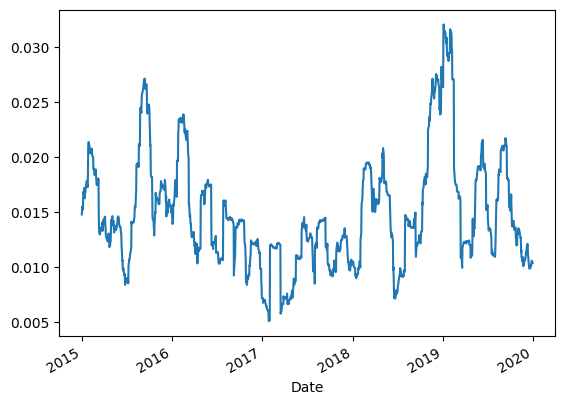

In [82]:
# ploting rolling volatility over 30 days sliding window for 12015-2019
(aapl_data
 .assign(pct_change_close=aapl_data.Close.pct_change())
 .rolling(window=30,min_periods=30)
 .pct_change_close
 .std()
 .loc['2015':'2019']
 .plot()
)

### Simple Moving Average

In [83]:
(aapl_data
 .assign(s1=aapl_data.Close.shift(1),
         s2=aapl_data.Close.shift(2),
         ma3=lambda df_:df_.loc[:, ['Close', 's1','s2']].mean(axis='columns'),
         ma3_builtin=aapl_data.Close.rolling(3).mean()
        )
)

,Adj Close,Close,High,Low,Open,Volume,cum_returns,s1,s2,ma3,ma3_builtin
Date,,,,,,,,,,,
2010-01-04 00:00:00+00:00,6.454506,7.643214,7.660714,7.585000,7.622500,493729600,0.000000,NaN,NaN,7.643214,NaN
2010-01-05 00:00:00+00:00,6.465665,7.656429,7.699643,7.616071,7.664286,601904800,0.001729,7.643214,NaN,7.649822,NaN
2010-01-06 00:00:00+00:00,6.362820,7.534643,7.686786,7.526786,7.656429,552160000,-0.014205,7.656429,7.643214,7.611429,7.611429
2010-01-07 00:00:00+00:00,6.351057,7.520714,7.571429,7.466071,7.562500,477131200,-0.016027,7.534643,7.656429,7.570595,7.570595
2010-01-08 00:00:00+00:00,6.393282,7.570714,7.571429,7.466429,7.510714,447610800,-0.009486,7.520714,7.534643,7.542024,7.542024
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23 00:00:00+00:00,68.908981,71.000000,71.062500,70.092499,70.132500,98572000,8.289286,69.860001,70.004997,70.288333,70.288333
2019-12-24 00:00:00+00:00,68.974503,71.067497,71.222504,70.730003,71.172501,48478800,8.298117,71.000000,69.860001,70.642499,70.642499
2019-12-26 00:00:00+00:00,70.343002,72.477501,72.495003,71.175003,71.205002,93121200,8.482594,71.067497,71.000000,71.514999,71.514999


<Axes: xlabel='Date'>

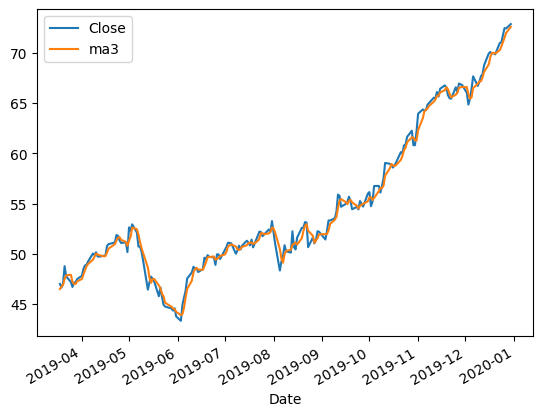

In [84]:
(aapl_data
 .assign(s1=aapl_data.Close.shift(1),
         s2=aapl_data.Close.shift(2),
         ma3=lambda df_:df_.loc[:, ['Close', 's1','s2']].mean(axis='columns'),
         ma3_builtin=aapl_data.Close.rolling(3).mean()
        )
 [['Close','ma3']]
 .iloc[-200:]
 .plot()
)

<Axes: xlabel='Date'>

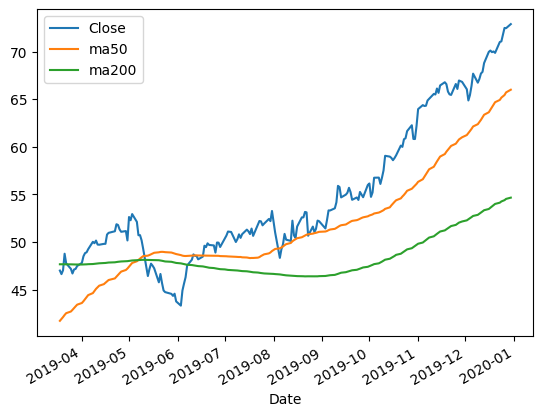

In [86]:
# 50 and 200 moving average plot
(aapl_data
 .assign(
          ma50=aapl_data.Close.rolling(50).mean(),
          ma200=aapl_data.Close.rolling(200).mean()
        )
 [['Close','ma50', 'ma200']]
 .iloc[-200:]  # last 200 rows
 .plot()
)

<Axes: xlabel='Date'>

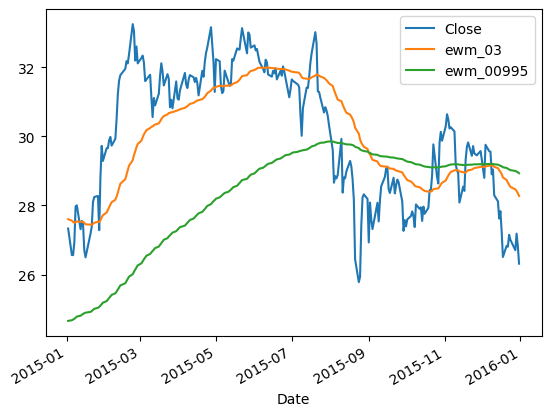

In [88]:
# Exponential moving average

# 50 and 200 moving average plot
(aapl_data
 .assign(
          ewm_03=aapl_data.Close.ewm(alpha=0.0392).mean(),
          ewm_00995=aapl_data.Close.ewm(alpha=0.00995).mean()
        )
 .loc['2015':'2015',['Close','ewm_03', 'ewm_00995']]
 .plot()
)

### Technical Analysis

In [93]:
# On-Balance Volumne (OBV)

def calc_obv(df,close_col='Close', vol_col='Volume'):
    close = df[close_col]
    volumne= df[vol_col]
    close_shift=close.shift(1)

    return (df
        .assign(vol=np.select([close>close_shift,
                               close==close_shift,
                               close<close_shift],
                              [volumne,0,-volumne]),
                obv=lambda df_:df_.vol.fillna(0).cumsum()
               )
        ['obv']
       )

(aapl_data
 .assign(obv=calc_obv)
)

,Adj Close,Close,High,Low,Open,Volume,cum_returns,obv
Date,,,,,,,,
2010-01-04 00:00:00+00:00,6.454506,7.643214,7.660714,7.585000,7.622500,493729600,0.000000,0
2010-01-05 00:00:00+00:00,6.465665,7.656429,7.699643,7.616071,7.664286,601904800,0.001729,601904800
2010-01-06 00:00:00+00:00,6.362820,7.534643,7.686786,7.526786,7.656429,552160000,-0.014205,49744800
2010-01-07 00:00:00+00:00,6.351057,7.520714,7.571429,7.466071,7.562500,477131200,-0.016027,-427386400
2010-01-08 00:00:00+00:00,6.393282,7.570714,7.571429,7.466429,7.510714,447610800,-0.009486,20224400
...,...,...,...,...,...,...,...,...
2019-12-23 00:00:00+00:00,68.908981,71.000000,71.062500,70.092499,70.132500,98572000,8.289286,14165094000
2019-12-24 00:00:00+00:00,68.974503,71.067497,71.222504,70.730003,71.172501,48478800,8.298117,14213572800
2019-12-26 00:00:00+00:00,70.343002,72.477501,72.495003,71.175003,71.205002,93121200,8.482594,14306694000


<Axes: xlabel='Date'>

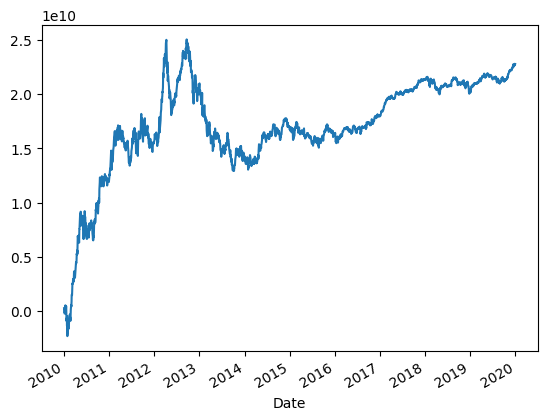

In [97]:
# Accumulation/Distribution Indicator (A/D)
#  MFM -> Money Floe Multiplier
# https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/accumulation-distribution

def calc_ad(df, close_col='Close', low_col='Low', high_col='High', vol_col='Volume'):
    close =df[close_col]
    low=df[low_col]
    high=df[high_col]
    return ( df
            .assign(mfm=((close-low)-(high-close))/(high-low),
                    mfv=lambda df_:df_.mfm*df_[vol_col],
                    cmfv=lambda df_:df_.mfv.cumsum())
            .cmfv
           )

                    
                    
(aapl_data
 .assign(ad=calc_ad)
 .ad
 .plot()
)

In [101]:
# RSI
# https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/RSI

def avg(df, col, window_size=14):
    results=[]
    window=[]
    for i, val in enumerate(df[col]):
        window.append(val)
        if i < (window_size):
            results.append(np.nan)
        elif i == (window_size):
            window.pop(0)
            results.append(sum(window)/window_size)
        else:
            results.append((results[-1]*(window_size-1)+val)/window_size)
    return pd.Series(results,index=df.index)        

(aapl_data
 .assign(change=lambda df:df['Close'].diff(),
         gain=lambda df:df.change.clip(lower=0),
         loss=lambda df:df.change.clip(upper=0),
         avg_gain=lambda df:avg(df, col='gain'),
         avg_loss=lambda df:avg(df, col='loss'),
         rs=lambda df:df.avg_gain/df.avg_loss,
         rsi=lambda df:np.select([df.avg_loss==0],[100],
                                  (100-(100/(1+df.rs))))
        )
)
         

,Adj Close,Close,High,Low,Open,Volume,cum_returns,change,gain,loss,avg_gain,avg_loss,rs,rsi
Date,,,,,,,,,,,,,,
2010-01-04 00:00:00+00:00,6.454506,7.643214,7.660714,7.585000,7.622500,493729600,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05 00:00:00+00:00,6.465665,7.656429,7.699643,7.616071,7.664286,601904800,0.001729,0.013215,0.013215,0.000000,NaN,NaN,NaN,NaN
2010-01-06 00:00:00+00:00,6.362820,7.534643,7.686786,7.526786,7.656429,552160000,-0.014205,-0.121786,0.000000,-0.121786,NaN,NaN,NaN,NaN
2010-01-07 00:00:00+00:00,6.351057,7.520714,7.571429,7.466071,7.562500,477131200,-0.016027,-0.013929,0.000000,-0.013929,NaN,NaN,NaN,NaN
2010-01-08 00:00:00+00:00,6.393282,7.570714,7.571429,7.466429,7.510714,447610800,-0.009486,0.050000,0.050000,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23 00:00:00+00:00,68.908981,71.000000,71.062500,70.092499,70.132500,98572000,8.289286,1.139999,1.139999,0.000000,0.431769,-0.150064,-2.877241,153.269661
2019-12-24 00:00:00+00:00,68.974503,71.067497,71.222504,70.730003,71.172501,48478800,8.298117,0.067497,0.067497,0.000000,0.405750,-0.139345,-2.911840,152.305620
2019-12-26 00:00:00+00:00,70.343002,72.477501,72.495003,71.175003,71.205002,93121200,8.482594,1.410004,1.410004,0.000000,0.477482,-0.129392,-3.690210,137.171816
